In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [15]:
from mod_my_utils.read_write_data import *
from mod_backtest_utils.backtest_ma import MovingAverageCrossStrategy
from mod_backtest_utils.portfolio import MarketOnPricePortfolio

In [16]:
stock_name = "aapl"
folder_name = "data/"
# stock_data = (folder_name=folder_name, symbol=stock_name, index_col="Date")

In [17]:
stock_data = get_price_csv(folder_name=folder_name, symbol=stock_name, index_col="Date")
stock_data.head()

stock name:  aapl


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0


In [18]:
data = stock_data[['Adj. Close']].copy()
data.columns = ['price']
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [19]:
strategy = MovingAverageCrossStrategy(stock_name, data, 40, 100, 30)

In [20]:
signals = strategy.generate_signals()

In [21]:
portfolio_ma = MarketOnPricePortfolio(stock_name, signals)

In [22]:
portfolio_macd = portfolio.backtest_portfolio()

In [24]:
portfolio_macd.head()

,holdings,cash,total
Date,,,
2007-12-03,0.0,100000.0,100000.0
2007-12-04,0.0,100000.0,100000.0
2007-12-05,0.0,100000.0,100000.0
2007-12-06,0.0,100000.0,100000.0
2007-12-07,0.0,100000.0,100000.0


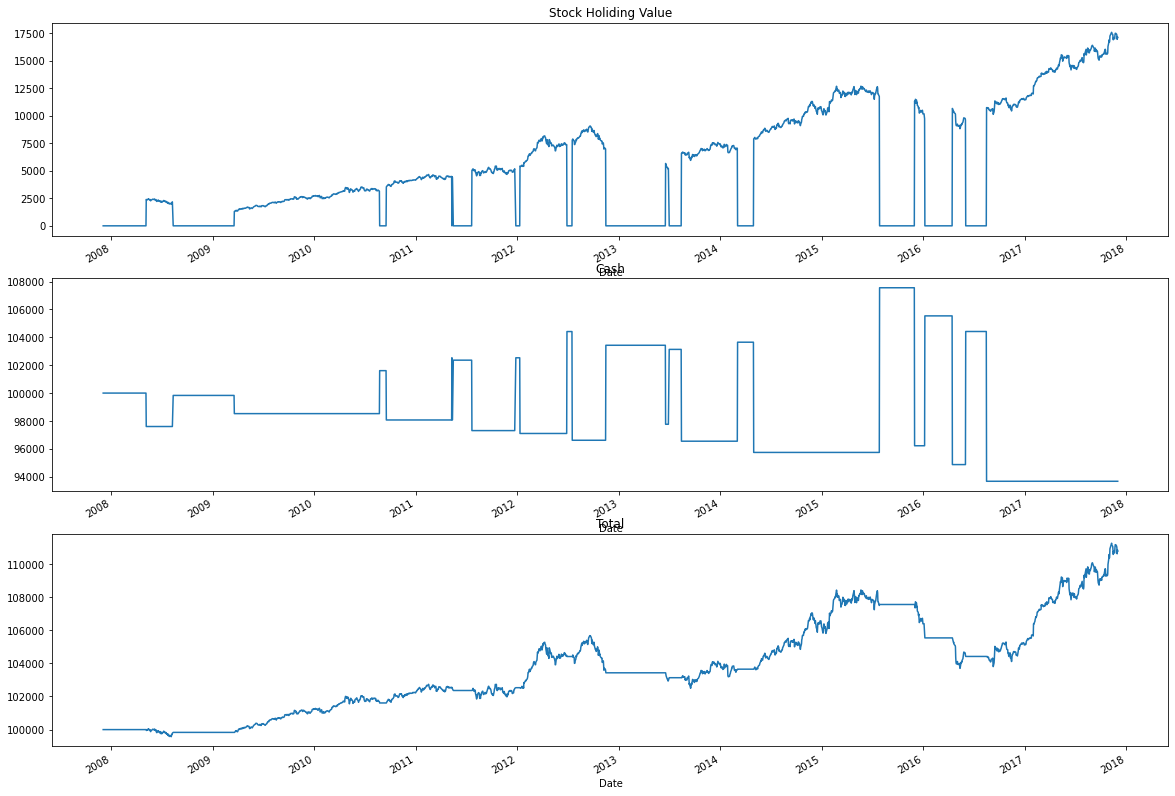

In [25]:
portfolio.plot_stock_portfolio()

In [31]:
portfolio = portfolio_macd

In [32]:
portfolio.head()

,holdings,cash,total
Date,,,
2007-12-03,0.0,100000.0,100000.0
2007-12-04,0.0,100000.0,100000.0
2007-12-05,0.0,100000.0,100000.0
2007-12-06,0.0,100000.0,100000.0
2007-12-07,0.0,100000.0,100000.0


In [33]:
# Add `returns` to portfolio
portflio['returns'] = portfolio_macd['total'].pct_change()

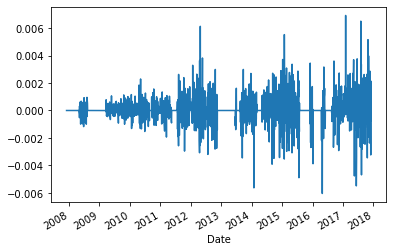

In [34]:
portflio['returns'].plot()
plt.show()

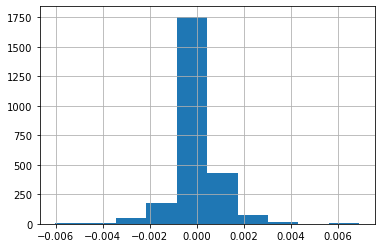

In [35]:
portflio['returns'].hist()
plt.show()

In [36]:
# cumulative daily return
portflio["cum_daily_return"] = (1 + portflio['returns']).cumprod()

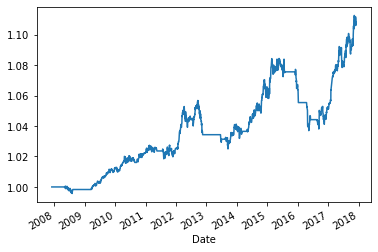

In [37]:
portflio["cum_daily_return"].plot()
plt.show()

### Sharpe Ratio
* The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk
* Sharpe ratio is a normalized return to compare two strategy 
* This may be inaccurate to apply on those portfolios or assets that do not have a normal distribution of expected return
* Many assets have a nigh degree of kurtosis (fat tails) or negative skeness

In [38]:
# Isolate the returns of your strategy
returns = portflio['returns']


# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7057061273644362


### Maximum Drawdown (MDD)
* A maximum drawdown is the maximum loss from a peak to a trough of a portfolio, before a new peak is attained
* MDD is an indicator of downside risk over a specified time period
* MDD can be used both as a stand alne mesure or as an input into other metrics such as return over maximum droadown and calmar ratio
* MDD is expressed in percentage terms and computed as
* MDD = (Trough Value - Peak Value) / Peak value
* MDD = (Trough Value / Peak Value) - 1

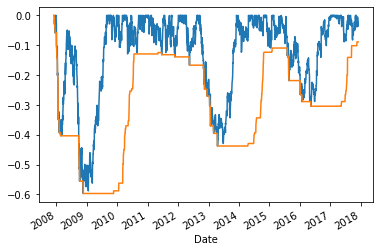

In [39]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = data['price'].rolling(window, min_periods=1).max()
daily_drawdown = data['price'] / rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Understanding step by step

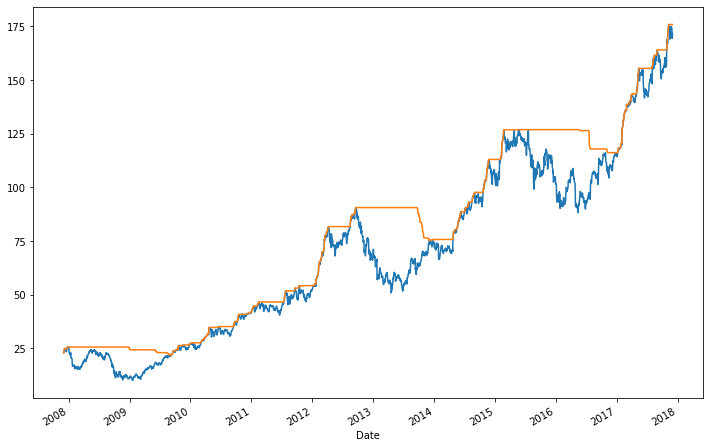

In [40]:
data['price'].plot(grid=True,figsize=(12,8))
rolling_max.plot()
plt.show()

In [41]:
# Calculate the max drawdown in the past window days for each day
daily_drawdown = data['price']/rolling_max - 1.0

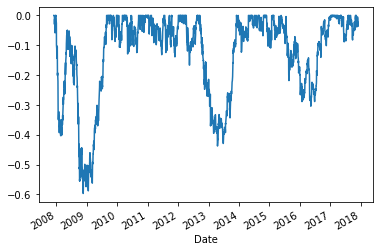

In [42]:
daily_drawdown.plot()
plt.show()

In [43]:
# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()


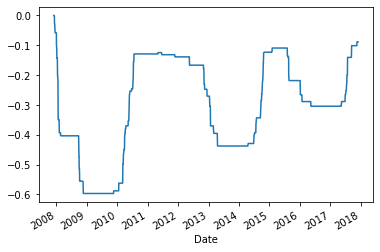

In [44]:
max_daily_drawdown.plot()
plt.show()

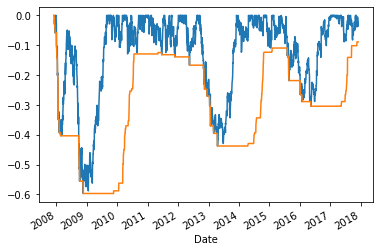

In [45]:
# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [46]:
portflio.head()

,holdings,cash,total,returns,cum_daily_return
Date,,,,,
2007-12-03,0.0,100000.0,100000.0,NaN,NaN
2007-12-04,0.0,100000.0,100000.0,0.0,1.0
2007-12-05,0.0,100000.0,100000.0,0.0,1.0
2007-12-06,0.0,100000.0,100000.0,0.0,1.0
2007-12-07,0.0,100000.0,100000.0,0.0,1.0


In [47]:
portflio['maximum_drawdown'] = max_daily_drawdown

In [48]:
portflio.head()

,holdings,cash,total,returns,cum_daily_return,maximum_drawdown
Date,,,,,,
2007-12-03,0.0,100000.0,100000.0,NaN,NaN,0.0
2007-12-04,0.0,100000.0,100000.0,0.0,1.0,0.0
2007-12-05,0.0,100000.0,100000.0,0.0,1.0,0.0
2007-12-06,0.0,100000.0,100000.0,0.0,1.0,0.0
2007-12-07,0.0,100000.0,100000.0,0.0,1.0,0.0


In [ ]:
class Metric(object):
    
    def __init__(self, symbol, signals, portfolio):
        self.symbol = symbol
        self.signals = signals
        self.portfolio = portfolio
        
        
    def returns():
        pass
    
    
    def sharpe_ratio():
        pass
    
    def trad_related():
        pass
    
    
    def other():
        pass
    
    def write_to_csv():
        pass
    
    def write_to_database():
        pass
    
    def metric_plot():
        pass